<a href="https://colab.research.google.com/github/joae1234/EDA-dengue-socioeconomico/blob/main/Projeto_ciencia_de_dadosv5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/maua_logo.png?raw=true" width=300, align="right">



# **Exploratory Data Analysis (EDA)**
## <Coloque aqui o Título da Análise>

In [ ]:
#@title **Identificação do Grupo**

#@markdown Nomes completos em ordem alfabética (*\<nome\>, \<RA\>*)
Aluno1 = 'João Pedro Soares dos Santos, 21004102' #@param {type:"string"}
Aluno2 = 'Carlos Augusto Freire Maia de Oliveira, 21007810' #@param {type:"string"}
Aluno3 = 'Nathan Zanoni da Hora; 21.01208-3' #@param {type:"string"}
Aluno4 = 'Gabriel Zendron Allievi; 21.01350-0' #@param {type:"string"}
Aluno5 = 'João Paulo de Souza Roddrigues; 21.01809-0' #@param {type:"string"}





# **Resumo (*Abstract*)**

Este trabalho tem como objetivo analisar e comparar os dados de casos de dengue no Brasil entre os anos de 2017 e 2024. Através da integração de dados públicos de saúde com indicadores socioeconômicos, como gastos com saneamento, taxa de desemprego e pobreza, buscamos identificar possíveis padrões, correlações e fatores que possam influenciar a incidência da doença nos diferentes estados do país. A análise é feita com o auxílio de técnicas de visualização de dados e estatística descritiva, com o intuito de oferecer uma visão mais clara sobre os desafios enfrentados no combate à dengue e contribuir para a formulação de políticas públicas mais eficazes.

# **Introdução**

Faça uma breve introdução do seu trabalho. Conceitue os pontos relevantes do seu  problema e, se for o caso, das técnicas de análise empregadas. Discuta a relevância, atualidade, limitações das análises existentes e o impacto que  sua análise pode trazer.

A dengue é uma das principais doenças tropicais negligenciadas no Brasil, com milhares de casos registrados anualmente em todas as regiões do país. Transmitida pelo mosquito Aedes aegypti, a proliferação da dengue está diretamente ligada a fatores ambientais e sociais, como saneamento básico precário, altas temperaturas, chuvas intensas e desigualdade socioeconômica.

O presente trabalho propõe uma análise exploratória dos casos de dengue registrados entre 2017 e 2024, buscando relacioná-los com indicadores como despesa pública com saúde e saneamento, taxa de pobreza e taxa de desemprego. A partir do cruzamento desses dados, pretendemos identificar quais fatores apresentam maior correlação com o aumento de casos, e quais estados apresentam maior vulnerabilidade.

As análises foram realizadas utilizando a linguagem Python e bibliotecas de ciência de dados como pandas, seaborn e matplotlib. Foram aplicadas técnicas de limpeza, agrupamento, cruzamento e visualização de dados, com o objetivo de revelar padrões e auxiliar na compreensão do cenário atual da dengue no país.

Esta abordagem se destaca pela atualidade dos dados e pela tentativa de integrar diferentes dimensões (saúde e socioeconômica) em uma única análise. Apesar das limitações, como possíveis lacunas nos dados oficiais e a ausência de variáveis ambientais (como temperatura e precipitação), o trabalho oferece contribuições relevantes para o entendimento da disseminação da dengue e para a elaboração de estratégias preventivas mais eficazes.

# **Descrição e origem dos dados**

Descreva sumariamente a fonte e os dados empregados.








Para a realização deste trabalho, foram utilizados dados públicos provenientes das seguintes plataformas:

- InfoDengue: Plataforma de monitoramento de arboviroses desenvolvida pela Fiocruz, que fornece dados sobre os casos notificados de dengue no Brasil, organizados por estado e ano. Essa base foi essencial para analisar a evolução temporal da doença e sua distribuição geográfica.

- IPEAdata: Sistema de acesso a dados do Instituto de Pesquisa Econômica Aplicada (IPEA), que reúne estatísticas econômicas e sociais. A partir dessa fonte, foram obtidos indicadores como taxa de desemprego, taxa de pobreza e despesas públicas com saúde e saneamento, também organizados por estado e ano.

Os dados compreendem o período de 2017 a 2024. Para a análise, foi realizada a padronização das variáveis, limpeza das bases e junção dos dados por meio de cruzamento pelas colunas de estado e ano. Isso possibilitou a construção de uma base integrada, com a qual foi possível investigar possíveis relações entre os casos de dengue e os fatores socioeconômicos analisados.

# **Aquisição e Preparação dos dados**

Faça aqui a aquisição dos dados, justificando e incluindo aqui eventuais reduções as efetuadas.

Não deixe de descrever e justificar reduções (seleções) feitas nos dados originais para os seus propósitos (por exemplo, selecionou somente dados do último ano, somente dados de países da América Latina ou selecionou somente algumas tabelas dentre várias tabelas disponíveis).








\

Como no infodengue só é possível requisitar dados para cada município, então foi decidido pegar os dados especificos dos municípios capitais já que eles são as cidades com mais populção e fluxo de pessoas de cada estado

In [ ]:
import pandas as pd
from datetime import datetime

# Dicionário com o geocode das capitais, município e estado
capitais = {
    '12': {'geocode': '1200401', 'municipio': 'Rio Branco', 'estado': 'Acre'},
    '27': {'geocode': '2704302', 'municipio': 'Maceió', 'estado': 'Alagoas'},
    '13': {'geocode': '1302603', 'municipio': 'Manaus', 'estado': 'Amazonas'},
    '16': {'geocode': '1600303', 'municipio': 'Macapá', 'estado': 'Amapá'},
    '29': {'geocode': '2927408', 'municipio': 'Salvador', 'estado': 'Bahia'},
    '23': {'geocode': '2304400', 'municipio': 'Fortaleza', 'estado': 'Ceará'},
    '53': {'geocode': '5300108', 'municipio': 'Brasília', 'estado': 'Distrito Federal'},
    '32': {'geocode': '3205309', 'municipio': 'Vitória', 'estado': 'Espírito Santo'},
    '52': {'geocode': '5208707', 'municipio': 'Goiânia', 'estado': 'Goiás'},
    '21': {'geocode': '2105302', 'municipio': 'São Luís', 'estado': 'Maranhão'},
    '31': {'geocode': '3106200', 'municipio': 'Belo Horizonte', 'estado': 'Minas Gerais'},
    '50': {'geocode': '5002704', 'municipio': 'Campo Grande', 'estado': 'Mato Grosso do Sul'},
    '51': {'geocode': '5103403', 'municipio': 'Cuiabá', 'estado': 'Mato Grosso'},
    '15': {'geocode': '1501402', 'municipio': 'Belém', 'estado': 'Pará'},
    '25': {'geocode': '2507507', 'municipio': 'João Pessoa', 'estado': 'Paraíba'},
    '26': {'geocode': '2611606', 'municipio': 'Recife', 'estado': 'Pernambuco'},
    '22': {'geocode': '2207701', 'municipio': 'Teresina', 'estado': 'Piauí'},
    '41': {'geocode': '4106902', 'municipio': 'Curitiba', 'estado': 'Paraná'},
    '33': {'geocode': '3304557', 'municipio': 'Rio de Janeiro', 'estado': 'Rio de Janeiro'},
    '24': {'geocode': '2408102', 'municipio': 'Natal', 'estado': 'Rio Grande do Norte'},
    '43': {'geocode': '4314902', 'municipio': 'Porto Alegre', 'estado': 'Rio Grande do Sul'},
    '11': {'geocode': '1100205', 'municipio': 'Porto Velho', 'estado': 'Rondônia'},
    '14': {'geocode': '1400100', 'municipio': 'Boa Vista', 'estado': 'Roraima'},
    '42': {'geocode': '4205407', 'municipio': 'Florianópolis', 'estado': 'Santa Catarina'},
    '28': {'geocode': '2800308', 'municipio': 'Aracaju', 'estado': 'Sergipe'},
    '35': {'geocode': '3550308', 'municipio': 'São Paulo', 'estado': 'São Paulo'},
    '17': {'geocode': '1721000', 'municipio': 'Palmas', 'estado': 'Tocantins'},
}

# Parâmetros fixos
disease = 'dengue'
data_format = 'json'
ew_start = 1
ew_end = 53
ey_start = 2017
ey_end = 2024

# URL base da API
url_base = 'https://info.dengue.mat.br/api/alertcity'

# Lista para armazenar DataFrames
dfs = []

# Loop pelas capitais
for uf, info in capitais.items():
    geocode = info['geocode']
    municipio = info['municipio']
    estado = info['estado']

    params = {
        'geocode': geocode,
        'disease': disease,
        'format': data_format,
        'ew_start': ew_start,
        'ew_end': ew_end,
        'ey_start': ey_start,
        'ey_end': ey_end
    }

    url = f"{url_base}?{'&'.join(f'{k}={v}' for k, v in params.items())}"
    try:
        df = pd.read_json(url)
        df['estado'] = estado
        df['municipio'] = municipio
        df['geocode'] = geocode

        # Se a coluna data_iniSE existir, converter ela para string no formato YYYY-MM-DD
        if 'data_iniSE' in df.columns:
            df['data'] = pd.to_datetime(df['data_iniSE'] / 1000, unit='s').dt.strftime('%Y-%m-%d')

        dfs.append(df)
        print(f"Dados coletados para {municipio} - {estado}")
    except Exception as e:
        print(f"Erro ao coletar dados de {municipio} - {estado}: {e}")

# Juntar todos os dados em um único DataFrame
df_dengue = pd.concat(dfs, ignore_index=True)

# Visualizar as primeiras linhas
print(df_dengue.head())

# Salvar o DataFrame em um arquivo CSV
nome_arquivo = 'dengue_capitais_2017_2024.csv'
df_dengue.to_csv(nome_arquivo, index=False, encoding='utf-8-sig')
print(f"\nArquivo CSV salvo como '{nome_arquivo}'!")


Dados coletados para Rio Branco - Acre
Dados coletados para Maceió - Alagoas
Dados coletados para Manaus - Amazonas
Dados coletados para Macapá - Amapá
Dados coletados para Salvador - Bahia
Dados coletados para Fortaleza - Ceará
Dados coletados para Brasília - Distrito Federal
Dados coletados para Vitória - Espírito Santo
Dados coletados para Goiânia - Goiás
Dados coletados para São Luís - Maranhão
Dados coletados para Belo Horizonte - Minas Gerais
Dados coletados para Campo Grande - Mato Grosso do Sul
Dados coletados para Cuiabá - Mato Grosso
Dados coletados para Belém - Pará
Dados coletados para João Pessoa - Paraíba
Dados coletados para Recife - Pernambuco
Dados coletados para Teresina - Piauí
Dados coletados para Curitiba - Paraná
Dados coletados para Rio de Janeiro - Rio de Janeiro
Dados coletados para Natal - Rio Grande do Norte
Dados coletados para Porto Alegre - Rio Grande do Sul
Dados coletados para Porto Velho - Rondônia
Dados coletados para Boa Vista - Roraima
Dados coletado

# Teste dengue

In [ ]:
print(f"O total de linhas em dftotal é: {len(df_dengue)}")

O total de linhas em dftotal é: 10842


In [ ]:
df_dengue.head(
)

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,estado,municipio,geocode,data
0,1.734826e+12,202452.0,519.0,519.0,519.0,519.0,0.999999,142.438416,0.0,4.0,...,90.0,NaN,NaN,NaN,NaN,52714.0,Acre,Rio Branco,1200401,2024-12-22
1,1.734221e+12,202451.0,498.0,498.0,498.0,498.0,1.000000,136.675003,0.0,4.0,...,76.0,NaN,NaN,NaN,NaN,52714.0,Acre,Rio Branco,1200401,2024-12-15
2,1.733616e+12,202450.0,354.0,354.0,354.0,354.0,1.000000,97.154526,0.0,4.0,...,73.0,NaN,NaN,NaN,NaN,52714.0,Acre,Rio Branco,1200401,2024-12-08
3,1.733011e+12,202449.0,318.0,318.0,318.0,318.0,1.000000,87.274406,0.0,3.0,...,63.0,NaN,NaN,NaN,NaN,52714.0,Acre,Rio Branco,1200401,2024-12-01
4,1.732406e+12,202448.0,177.0,177.0,177.0,177.0,0.996834,48.577263,0.0,2.0,...,38.0,NaN,NaN,NaN,NaN,52714.0,Acre,Rio Branco,1200401,2024-11-24


In [ ]:
df_dengue.tail()

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,casprov,casprov_est,casprov_est_min,casprov_est_max,casconf,notif_accum_year,estado,municipio,geocode,data
10837,1.485648e+12,201705.0,154.0,154.0,154.0,154.0,0.999943,50.278164,0.0,2.0,...,48.0,NaN,NaN,NaN,NaN,72294.0,Tocantins,Palmas,1721000,2017-01-29
10838,1.485043e+12,201704.0,117.0,117.0,117.0,117.0,0.987861,38.198345,0.0,2.0,...,40.0,NaN,NaN,NaN,NaN,72294.0,Tocantins,Palmas,1721000,2017-01-22
10839,1.484438e+12,201703.0,86.0,86.0,86.0,86.0,0.143289,28.077415,0.0,2.0,...,24.0,NaN,NaN,NaN,NaN,72294.0,Tocantins,Palmas,1721000,2017-01-15
10840,1.483834e+12,201702.0,74.0,74.0,74.0,74.0,0.005476,24.159636,0.0,2.0,...,21.0,NaN,NaN,NaN,NaN,72294.0,Tocantins,Palmas,1721000,2017-01-08
10841,1.483229e+12,201701.0,74.0,74.0,74.0,74.0,0.517206,24.159636,0.0,2.0,...,23.0,NaN,NaN,NaN,NaN,72294.0,Tocantins,Palmas,1721000,2017-01-01


In [ ]:
df_dengue.columns

Index(['data_iniSE', 'SE', 'casos_est', 'casos_est_min', 'casos_est_max',
       'casos', 'p_rt1', 'p_inc100k', 'Localidade_id', 'nivel', 'id',
       'versao_modelo', 'tweet', 'Rt', 'pop', 'tempmin', 'umidmax',
       'receptivo', 'transmissao', 'nivel_inc', 'umidmed', 'umidmin',
       'tempmed', 'tempmax', 'casprov', 'casprov_est', 'casprov_est_min',
       'casprov_est_max', 'casconf', 'notif_accum_year', 'estado', 'municipio',
       'geocode', 'data'],
      dtype='object')

# **As colunas significam:**

  **🕒 Informações Temporais**

- data_iniSE: Data de início da Semana Epidemiológica (SE).

- SE: Semana Epidemiológica do ano.

- data: Data de referência do dado (pode ser igual ou próxima a data_iniSE).


  **🦟 Casos de Dengue**

- casos: Casos notificados de dengue na semana na localidade.

- casos_est: Estimativa modelada do número de casos de dengue.

- casos_est_min: Limite inferior da estimativa (intervalo de confiança).

- casos_est_max: Limite superior da estimativa.

- casprov: Casos prováveis (suspeitos).

- casprov_est: Estimativa de casos prováveis.

- casprov_est_min / casprov_est_max: Intervalo de confiança da estimativa de casos prováveis.

- casconf: Casos confirmados.

- notif_accum_year: Número acumulado de casos notificados no ano corrente.



  **📊 Modelagem e Risco**
- p_rt1: Probabilidade de que o Rt (taxa de reprodução) seja maior que 1 — ou seja, indica se há potencial de expansão da epidemia.

- Rt: Número reprodutivo efetivo (quanto cada pessoa infectada transmite para outras). Rt > 1 indica expansão da doença.

- p_inc100k: Probabilidade de incidência maior que 100 casos por 100 mil habitantes.

- nivel: Nível de alerta do município (ex.: verde, amarelo, laranja, vermelho).

- nivel_inc: Nível de incidência (faixa categórica da taxa de incidência).

- tweet: Pode indicar número de menções de dengue no Twitter (eventualmente usado para validação social).

- versao_modelo: Versão do modelo estatístico usado nas estimativas.


  **🌡️ Condições Climáticas**

- tempmin / tempmed / tempmax: Temperatura mínima, média e máxima da semana.

- umidmin / umidmed / umidmax: Umidade relativa mínima, média e máxima.

- receptivo: Se a localidade é receptiva à transmissão de dengue (baseado em clima e presença do vetor).

- transmissao: Indicação se há transmissão ativa da doença.


  **🌍 Informações Geográficas**

- estado: Nome do estado.

- municipio: Nome do município.

- geocode: Código IBGE do município.

- Localidade_id / id: Identificadores internos da localidade

# **Para os Dados Socioeconomicos**
Para os dados socioeconomicos de cada região, foi decidido pegar várias tabelas do site [Ipeadata](http://www.ipeadata.gov.br/Default.aspx) , e em seguida as tabelas foram tratadas e então unificadas em um único csv, foram coletados s seguintes dados:
- Taxa de desemprego
- Demissões anuais
- Admissões anuais
- Auxiliares e técnicos de saúde por 10.000 habitantes
- Despesa por função - saúde e saneamento - empenhada - estadual
- IVS - subíndice de Renda e Trabalho
- Taxa de pobreza nacional
- População

Abaixo ocorre o tratamento da tabela da taxa de desemprego pois esse csv mostra a taxa de desempredo de cada trimestre de cada ano, então foi decido para o tratamento dos dados criar ums csv novo mantendo as taxas de desemprego no final de cada ano

In [ ]:
 import pandas as pd

# URL do CSV no GitHub
url = 'https://raw.githubusercontent.com/joae1234/EDA-dengue-socioeconomico/refs/heads/main/ipeadata%5B02-05-2025-01-07%5D%20taxa%20de%20desemprego.csv'

# Ler o arquivo CSV mantendo a primeira linha como tópico
import requests
from io import StringIO

response = requests.get(url)
response.encoding = 'utf-8'
conteudo = response.text

# Separar a primeira linha (tópico) e ler o restante como DataFrame
topico, dados_csv = conteudo.split('\n', 1)
df = pd.read_csv(StringIO(dados_csv), sep=';', decimal=',')

# Verificar estrutura do arquivo
print("Tópico:", topico)
print("\nPrimeiras linhas dos dados:")
print(df.head())

# Limpar espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Identificar colunas de dados trimestrais (formato YYYY TQ)
colunas_dados = [col for col in df.columns if 'T' in col and col.split('T')[0].strip().isdigit()]

# Dicionário para armazenar o último trimestre de cada ano
ultimo_trimestre = {}

# Processar cada coluna para identificar o último trimestre
for col in colunas_dados:
    ano, trimestre = col.split('T')
    ano = ano.strip()
    trimestre = trimestre.strip()

    if ano in ultimo_trimestre:
        if int(trimestre) > int(ultimo_trimestre[ano][1]):
            ultimo_trimestre[ano] = (col, trimestre)
    else:
        ultimo_trimestre[ano] = (col, trimestre)

# Selecionar apenas as colunas do último trimestre de cada ano
colunas_manter = ['Sigla', 'Código', 'Estado'] + [v[0] for v in ultimo_trimestre.values()]
df_final = df[colunas_manter].copy()

# Renomear colunas para manter apenas o ano
df_final.columns = ['Sigla', 'Código', 'Estado'] + [col.split('T')[0].strip() for col in df_final.columns[3:]]

# Ordenar colunas por ano
colunas_ordenadas = ['Sigla', 'Código', 'Estado'] + sorted(
    [col for col in df_final.columns if col.isdigit()],
    key=lambda x: int(x)
)
df_final = df_final[colunas_ordenadas]

# Salvar mantendo o tópico na primeira linha
arquivo_saida = 'taxa_desemprego_ultimo_trimestre.csv'
with open(arquivo_saida, 'w', encoding='utf-8-sig') as f:
    f.write(topico + '\n')  # Escreve o tópico original
    df_final.to_csv(f, index=False, sep=';', decimal=',')

print(f"\n✅ Arquivo salvo como: {arquivo_saida}")
print("Estrutura do arquivo gerado:")
print(topico)
print(df_final.head())


Tópico: ﻿Taxa de desemprego - sem instrução ou equivalente (IBGE/Pnad Contínua)

Primeiras linhas dos dados:
  Sigla  Código    Estado  2017 T1  2017 T2  2017 T3  2017 T4  2018 T1  \
0    AC      12      Acre      7.8      7.0      7.0      6.9      5.4   
1    AL      27   Alagoas     12.1     15.4     10.5     10.1     13.4   
2    AM      13  Amazonas      5.4      3.1      5.4      3.3      2.1   
3    AP      16     Amapá      4.0     17.6      7.7     14.0     12.5   
4    BA      29     Bahia     13.5     13.3     11.6     12.8     16.0   

   2018 T2  2018 T3  ...  2022 T4  2023 T1  2023 T2  2023 T3  2023 T4  \
0      7.6      4.5  ...      9.9      5.8      5.7      4.8      3.8   
1     10.2     14.0  ...      6.0      5.9      5.8      7.1      9.4   
2      6.5      4.9  ...      2.9      1.0      3.6      3.4      4.3   
3     14.3     11.2  ...     11.9      9.8      5.5      6.9      7.8   
4     10.9     13.7  ...      7.9      6.9      9.2      8.7      7.0   

   2024

No caso da tabela da demissões, mostra os valores para os meses de cada anos, ntão foi gerado um csv novo pcom os valores totais de cada ano

In [ ]:
import pandas as pd
import requests
from io import StringIO

# URL do arquivo CSV
url = 'https://raw.githubusercontent.com/joae1234/EDA-dengue-socioeconomico/refs/heads/main/ipeadata%5B02-05-2025-12-43%5D%20demissoes.csv'  # Substitua pelo URL real

# Baixar o conteúdo do arquivo
response = requests.get(url)
response.encoding = 'utf-8'  # Definir a codificação correta

# Ler o arquivo CSV mantendo a primeira linha como tópico
with StringIO(response.text) as f:
    topico = f.readline().strip()  # Lê a primeira linha (tópico)
    df = pd.read_csv(f, sep=';', decimal=',')  # Lê o resto como DataFrame

# Verificar estrutura do arquivo
print("Tópico:", topico)
print("\nPrimeiras linhas dos dados:")
print(df.head())

# Limpar espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Identificar colunas de dados (formato YYYY.MM)
colunas_dados = [col for col in df.columns if '.' in col and col.split('.')[0].isdigit()]

# Processar os dados mensais para totais anuais
df_mensal = df.melt(id_vars=['Sigla', 'Código', 'Estado'],
                   value_vars=colunas_dados,
                   var_name='Periodo',
                   value_name='Demissoes')

# Extrair ano e converter valores
df_mensal['Ano'] = df_mensal['Periodo'].str.split('.').str[0]
df_mensal['Demissoes'] = pd.to_numeric(
    df_mensal['Demissoes'].astype(str).str.replace('.', '').str.replace(',', '.'),
    errors='coerce'
)

# Calcular totais anuais
df_anual = df_mensal.groupby(['Sigla', 'Código', 'Estado', 'Ano'])['Demissoes'].sum().reset_index()

# Pivotar para formato wide
df_final = df_anual.pivot(index=['Sigla', 'Código', 'Estado'],
                         columns='Ano',
                         values='Demissoes').reset_index()

# Ordenar colunas
anos_ordenados = sorted([col for col in df_final.columns if col.isdigit()], key=int)
df_final = df_final[['Sigla', 'Código', 'Estado'] + anos_ordenados]

# Salvar mantendo o tópico na primeira linha
with open('demissoes_anuais.csv', 'w', encoding='utf-8-sig') as f:
    f.write(topico + '\n')  # Escreve o tópico original
    df_final.to_csv(f, index=False, sep=';', decimal=',')

print("\nArquivo salvo como 'demissoes_anuais.csv'")
print("Estrutura do arquivo gerado:")
print(topico)
print(df_final.head())

Tópico: ﻿Empregados - demissões - Novo Caged sem ajuste

Primeiras linhas dos dados:
  Sigla  Código    Estado  2020.01  2020.02  2020.03  2020.04  2020.05  \
0    AC      12      Acre     2179     1802     2238     1805     1405   
1    AL      27   Alagoas    12236    16654    12578     9855     7371   
2    AM      13  Amazonas    11943    10607    13602    14292    10346   
3    AP      16     Amapá     1831     1562     1613     1341     1007   
4    BA      29     Bahia    45832    41478    57354    55652    41697   

   2020.06  2020.07  ...  2024.06  2024.07  2024.08  2024.09  2024.10  \
0     1423     1521  ...     3499     4206     4140     3687     4509   
1     4697     5483  ...    11915    13679    15274    13548    14399   
2     8126     9223  ...    18808    21298    21922    21809    23621   
3      998     1601  ...     3107     3681     3272     3250     3689   
4    32099    31638  ...    68293    74209    73629    68480    82789   

   2024.11  2024.12  2025.01  2

O mesmo da tabela de demissão foi aplicado na tabela de admissoes

In [ ]:
import pandas as pd
import requests
from io import StringIO

# URL do arquivo CSV
url = 'https://raw.githubusercontent.com/joae1234/EDA-dengue-socioeconomico/refs/heads/main/ipeadata%5B02-05-2025-12-37%5D%20admissoes.csv'  # Substitua pelo URL real

# Baixar o conteúdo do arquivo
response = requests.get(url)
response.encoding = 'utf-8'  # Definir a codificação correta

# Ler o arquivo CSV mantendo a primeira linha como tópico
with StringIO(response.text) as f:
    topico = f.readline().strip()  # Lê a primeira linha (tópico)
    df = pd.read_csv(f, sep=';', decimal=',')  # Lê o resto como DataFrame

# Verificar estrutura do arquivo
print("Tópico:", topico)
print("\nPrimeiras linhas dos dados:")
print(df.head())

# Limpar espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Identificar colunas de dados (formato YYYY.MM)
colunas_dados = [col for col in df.columns if '.' in col and col.split('.')[0].isdigit()]

# Processar os dados mensais para totais anuais
df_mensal = df.melt(id_vars=['Sigla', 'Código', 'Estado'],
                   value_vars=colunas_dados,
                   var_name='Periodo',
                   value_name='Admissoes')

# Extrair ano e converter valores
df_mensal['Ano'] = df_mensal['Periodo'].str.split('.').str[0]
df_mensal['Admissoes'] = pd.to_numeric(
    df_mensal['Admissoes'].astype(str).str.replace('.', '').str.replace(',', '.'),
    errors='coerce'
)

# Calcular totais anuais
df_anual = df_mensal.groupby(['Sigla', 'Código', 'Estado', 'Ano'])['Admissoes'].sum().reset_index()

# Pivotar para formato wide
df_final = df_anual.pivot(index=['Sigla', 'Código', 'Estado'],
                         columns='Ano',
                         values='Admissoes').reset_index()

# Ordenar colunas
anos_ordenados = sorted([col for col in df_final.columns if col.isdigit()], key=int)
df_final = df_final[['Sigla', 'Código', 'Estado'] + anos_ordenados]

# Salvar mantendo o tópico na primeira linha
with open('admissoes_anuais.csv', 'w', encoding='utf-8-sig') as f:
    f.write(topico + '\n')  # Escreve o tópico original
    df_final.to_csv(f, index=False, sep=';', decimal=',')

print("\nArquivo salvo como 'admissoes_anuais.csv'")
print("Estrutura do arquivo gerado:")
print(topico)
print(df_final.head())

Tópico: ﻿Empregados - admissões - Novo Caged sem ajuste

Primeiras linhas dos dados:
  Sigla  Código    Estado  2020.01  2020.02  2020.03  2020.04  2020.05  \
0    AC      12      Acre     2384     2602     2311     1602     1535   
1    AL      27   Alagoas     7701     7896     6913     2760     4999   
2    AM      13  Amazonas    12681    12123    10920     5709     5500   
3    AP      16     Amapá     1721     1753     1318      536      809   
4    BA      29     Bahia    46691    47644    44432    23170    24664   

   2020.06  2020.07  ...  2024.06  2024.07  2024.08  2024.09  2024.10  \
0     1535     1804  ...     4413     4750     4492     4642     4656   
1     5560     7054  ...    14601    16625    20445    28968    17844   
2     7853    12197  ...    23844    26037    27276    24472    26221   
3     1024     1459  ...     5081     4153     4622     4206     4086   
4    29566    34820  ...    77192    83823    89778    83366    82210   

   2024.11  2024.12  2025.01  2

Aqui ocore a junção de todos os csv em um só

In [ ]:
import pandas as pd
import requests
from io import StringIO

# Configurações
base_url = "https://raw.githubusercontent.com/joae1234/EDA-dengue-socioeconomico/main/"
arquivos_locais = {
    'admissoes_anuais.csv': 'Admissoes',
    'demissoes_anuais.csv': 'Demissoes',
    'taxa_desemprego_ultimo_trimestre.csv': 'Taxa_Desemprego'
}

arquivos_github = {
    'ipeadata[02-05-2025-12-26]Despesa por função - saúde e saneamento - empenhada - estadual.csv': 'Despesa_Saude_Saneamento',
    'ipeadataIVS - subíndice de Renda e Trabalho.csv': 'IVS_Renda_Trabalho',
    'ipeadata taxa de pobreza nacional.csv': 'Taxa_Pobreza',
    'ipeadata populacao.csv': 'Populacao'
}

# Função para ler arquivos locais com cabeçalho na segunda linha
def ler_arquivo_local(nome_arquivo):
    try:
        # Ler pulando a primeira linha (tópico) e usando a segunda como cabeçalho
        df = pd.read_csv(nome_arquivo, sep=';', decimal=',', encoding='utf-8-sig', skiprows=1)
        return df
    except Exception as e:
        print(f"Erro ao ler {nome_arquivo}: {str(e)}")
        return None

# Função para ler arquivos do GitHub (cabeçalho na segunda linha)
def ler_arquivo_github(nome_arquivo):
    try:
        url = base_url + nome_arquivo.replace(' ', '%20')
        response = requests.get(url)
        response.encoding = 'utf-8'

        # Ler pulando a primeira linha (tópico)
        df = pd.read_csv(StringIO(response.text), sep=';', decimal=',', skiprows=1)
        return df
    except Exception as e:
        print(f"Erro ao processar {nome_arquivo}: {str(e)}")
        return None

# Processamento dos arquivos
dfs = {}

# Processar arquivos locais
for arquivo, variavel in arquivos_locais.items():
    print(f"\nProcessando arquivo local: {arquivo}")
    df = ler_arquivo_local(arquivo)

    if df is not None:
        df.columns = df.columns.str.strip()

        # Verificar colunas necessárias
        colunas_necessarias = ['Sigla', 'Código', 'Estado']
        if not all(col in df.columns for col in colunas_necessarias):
            print(f"Aviso: {arquivo} não contém todas as colunas necessárias {colunas_necessarias}")
            continue

        # Transformar para formato longo
        id_vars = ['Sigla', 'Código', 'Estado']
        value_vars = [col for col in df.columns if col.replace('.', '').isdigit()]

        if not value_vars:
            print(f"Aviso: Nenhuma coluna de dados encontrada em {arquivo}")
            continue

        df_long = df.melt(id_vars=id_vars,
                         value_vars=value_vars,
                         var_name='Ano',
                         value_name=variavel)

        dfs[variavel] = df_long

# Processar arquivos do GitHub
for arquivo, variavel in arquivos_github.items():
    print(f"\nProcessando arquivo do GitHub: {arquivo}")
    df = ler_arquivo_github(arquivo)

    if df is not None:
        df.columns = df.columns.str.strip()

        # Verificar colunas necessárias
        colunas_necessarias = ['Sigla', 'Código', 'Estado']
        if not all(col in df.columns for col in colunas_necessarias):
            print(f"Aviso: {arquivo} não contém todas as colunas necessárias {colunas_necessarias}")
            continue

        # Transformar para formato longo
        id_vars = ['Sigla', 'Código', 'Estado']
        value_vars = [col for col in df.columns if col.replace('.', '').isdigit()]

        if not value_vars:
            print(f"Aviso: Nenhuma coluna de dados encontrada em {arquivo}")
            continue

        df_long = df.melt(id_vars=id_vars,
                         value_vars=value_vars,
                         var_name='Ano',
                         value_name=variavel)

        dfs[variavel] = df_long

# Consolidação dos dados
if not dfs:
    print("\nNenhum DataFrame foi carregado com sucesso. Verifique os arquivos de entrada.")
else:
    # Começar com o primeiro DataFrame disponível
    df_final = dfs[next(iter(dfs))]

    # Fazer merge com os demais DataFrames
    for variavel, df in dfs.items():
        if variavel != next(iter(dfs)):
            df_final = pd.merge(df_final, df,
                              on=['Sigla', 'Código', 'Estado', 'Ano'],
                              how='outer')

    # Ordenação e limpeza
    colunas_ordenadas = ['Sigla', 'Código', 'Estado', 'Ano'] + sorted(
        [col for col in df_final.columns if col not in ['Sigla', 'Código', 'Estado', 'Ano']])
    df_final = df_final[colunas_ordenadas]

    df_final = df_final.sort_values(['Sigla', 'Ano'])
    df_final['Ano'] = df_final['Ano'].astype(str).str.replace('.0', '')

    # Salvar resultado
    output_file = 'dados_consolidados.csv'
    df_final.to_csv(output_file, index=False, sep=';', decimal=',', encoding='utf-8-sig')

    print("\nConsolidação concluída!")
    print(f"Arquivo salvo como: {output_file}")
    print(f"Total de registros: {len(df_final)}")
    print(f"Variáveis incluídas: {list(dfs.keys())}")

    print("\nVisualização das primeiras linhas:")
    print(df_final.head())


Processando arquivo local: admissoes_anuais.csv

Processando arquivo local: demissoes_anuais.csv

Processando arquivo local: taxa_desemprego_ultimo_trimestre.csv

Processando arquivo do GitHub: ipeadata[02-05-2025-12-26]Despesa por função - saúde e saneamento - empenhada - estadual.csv

Processando arquivo do GitHub: ipeadataIVS - subíndice de Renda e Trabalho.csv

Processando arquivo do GitHub: ipeadata taxa de pobreza nacional.csv

Processando arquivo do GitHub: ipeadata populacao.csv

Consolidação concluída!
Arquivo salvo como: dados_consolidados.csv
Total de registros: 945
Variáveis incluídas: ['Admissoes', 'Demissoes', 'Taxa_Desemprego', 'Despesa_Saude_Saneamento', 'IVS_Renda_Trabalho', 'Taxa_Pobreza', 'Populacao']

Visualização das primeiras linhas:
  Sigla  Código Estado   Ano  Admissoes  Demissoes  Despesa_Saude_Saneamento  \
0    AC      12   Acre  1991        NaN        NaN                       NaN   
1    AC      12   Acre  1992        NaN        NaN                       

In [ ]:
print(df_final.head(10))

  Sigla  Código Estado   Ano  Admissoes  Demissoes  Despesa_Saude_Saneamento  \
0    AC      12   Acre  1991        NaN        NaN                       NaN   
1    AC      12   Acre  1992        NaN        NaN                       NaN   
2    AC      12   Acre  1993        NaN        NaN                       NaN   
3    AC      12   Acre  1994        NaN        NaN                       NaN   
4    AC      12   Acre  1995        NaN        NaN                       NaN   
5    AC      12   Acre  1996        NaN        NaN                       NaN   
6    AC      12   Acre  1997        NaN        NaN                       NaN   
7    AC      12   Acre  1998        NaN        NaN                       NaN   
8    AC      12   Acre  1999        NaN        NaN                       NaN   
9    AC      12   Acre  2000        NaN        NaN                       NaN   

   IVS_Renda_Trabalho  Populacao  Taxa_Desemprego  Taxa_Pobreza  
0                 NaN   417718.0              NaN    

# **Análises**

Busque orientar sua análise a perguntas que sejam feitas aos dados. Empregue de 5 a 6 perguntas relevantes, que podem estar relacionadas 1-2 temas dentro do problema escolhido. Empregue seleções, gráficos e outros recursos que julgar necessário para **comunicar** suas análises. Empregue instrumentos que dão suporte à sua análise, como correlações, gráficos, pareto, teste de hipóteses etc.

Abaixo um modelo opcional para as perguntas.

## Q1. Quais estados respondem juntos por 80% do total de casos? (Princípio de Pareto)



<ipython-input-12-2751b5d19886>:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(totais_estado_100k['estado'], rotation=90)


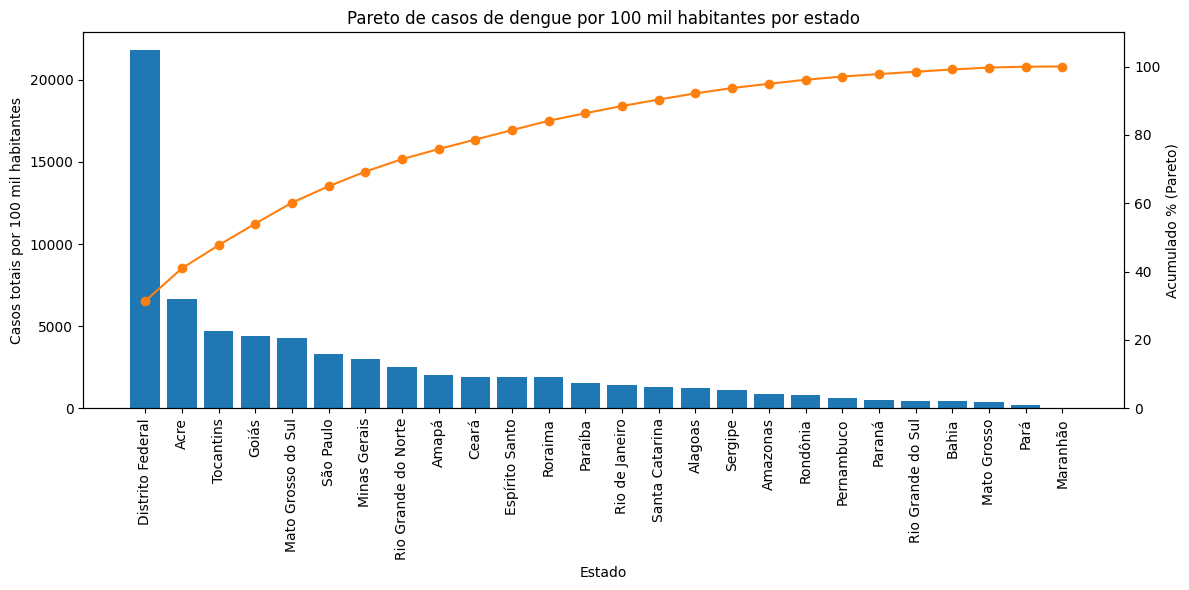


Estados que respondem juntos por até 80% dos casos por 100 mil habitantes:
                 estado  casos_por_100k_totais        pct   pct_acum
6      Distrito Federal           21799.408470  31.368811  31.368811
0                  Acre            6653.651102   9.574440  40.943251
25            Tocantins            4698.727497   6.761353  47.704604
8                 Goiás            4392.305587   6.320419  54.025023
11   Mato Grosso do Sul            4267.289670   6.140525  60.165548
24            São Paulo            3332.654365   4.795607  64.961155
12         Minas Gerais            2978.629532   4.286174  69.247329
17  Rio Grande do Norte            2535.429898   3.648421  72.895750
2                 Amapá            2052.958166   2.954156  75.849907
5                 Ceará            1936.601763   2.786722  78.636629


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
# Carregar os dados socioeconômicos consolidados
df_socio = pd.read_csv('dados_consolidados.csv', sep=';', decimal=',')

# Converter a coluna 'Ano' para inteiro em ambos os dataframes
df_dengue['data'] = pd.to_datetime(df_dengue['data'])
df_dengue['Ano'] = df_dengue['data'].dt.year
df_socio['Ano'] = df_socio['Ano'].astype(int)

# Agrupar os dados de dengue por estado e ano para obter o total de casos por ano/estado
totais_estado_ano = (
    df_dengue
      .groupby(['estado', 'Ano'])['casos']
      .sum()
      .reset_index(name='casos_totais')
)



# Assumindo que 'Estado' no df_socio corresponde a 'estado' no df_dengue, fazemos o merge
# Renomear a coluna 'Estado' no df_socio para 'estado' para facilitar o merge
df_socio_renomeado = df_socio.rename(columns={'Estado': 'estado'})

# Merge dos dataframes
df_merged = pd.merge(totais_estado_ano, df_socio_renomeado[['estado', 'Ano', 'Populacao']],
                     on=['estado', 'Ano'],
                     how='left')

# Calcular casos por 100 mil habitantes
# Evitar divisão por zero ou população ausente/zero
df_merged['casos_por_100k_hab'] = df_merged.apply(
    lambda row: (row['casos_totais'] / row['Populacao'] * 100000) if row['Populacao'] > 0 else 0, axis=1
)


# Para o gráfico de Pareto, geralmente focamos em um período.
# Vamos calcular os casos por 100k habitantes totais por estado para todos os anos disponíveis
totais_estado_100k = (
    df_merged
      .groupby('estado')['casos_por_100k_hab']
      .sum() # Sumariza os casos por 100k ao longo dos anos por estado
      .reset_index(name='casos_por_100k_totais')
      .sort_values('casos_por_100k_totais', ascending=False)
)


# Calcula participação e acumulado
totais_estado_100k['pct'] = 100 * totais_estado_100k['casos_por_100k_totais'] / totais_estado_100k['casos_por_100k_totais'].sum()
totais_estado_100k['pct_acum'] = totais_estado_100k['pct'].cumsum()

# Pareto bar + linha acumulada
fig, ax = plt.subplots(figsize=(12,6)) # Aumenta o tamanho da figura para melhor visualização dos labels
ax.bar(totais_estado_100k['estado'], totais_estado_100k['casos_por_100k_totais'])
ax2 = ax.twinx()
ax2.plot(totais_estado_100k['estado'], totais_estado_100k['pct_acum'], color='C1', marker='o')
ax.set_xticklabels(totais_estado_100k['estado'], rotation=90)
ax.set_xlabel("Estado")
ax.set_ylabel("Casos totais por 100 mil habitantes")
ax2.set_ylabel("Acumulado % (Pareto)")
ax.set_title("Pareto de casos de dengue por 100 mil habitantes por estado")
ax2.set_ylim(0, 110) # Ajusta o limite do eixo Y secundário para percentagem
ax2.grid(False) # Remove a grade do eixo secundário
plt.tight_layout()
plt.show()

# Quais estados estão até 80% do acumulado?
print("\nEstados que respondem juntos por até 80% dos casos por 100 mil habitantes:")
print(totais_estado_100k[totais_estado_100k['pct_acum'] <= 80])


O diagrama Pareto revela uma concentração extrema dos casos de dengue em um grupo seleto de unidades federativas. Dez estados — Distrito Federal (31,4%), Acre (9,6%), Tocantins (6,8%), Goiás (6,3%), Mato Grosso do Sul (6,1%), São Paulo (4,8%), Minas Gerais (4,3%), Rio Grande do Norte (3,6%), Amapá (3,0%) e Ceará (2,8%) — respondem juntos por aproximadamente 78,6% do total de casos por 100 mil habitantes. A análise mostra que apenas esses dez estados concentram quase quatro quintos da incidência de dengue no país quando consideramos a taxa populacional.

Notavelmente, o Distrito Federal sozinho responde por quase um terço (31,4%) dos casos ajustados por população, seguido por Acre e Tocantins com participações significativas. Essa distribuição geográfica desigual reforça a necessidade de priorizar ações de vigilância epidemiológica, alocação estratégica de recursos e campanhas de prevenção específicas para essas regiões de alta incidência. O padrão permanece consistente mesmo quando se considera a taxa por 100 mil habitantes, confirmando a hiperconcentração da doença em determinadas localidades.

## Q2. Qual o comportamento de casos de dengue ao longo do tempo dos seis estados mais afetados?

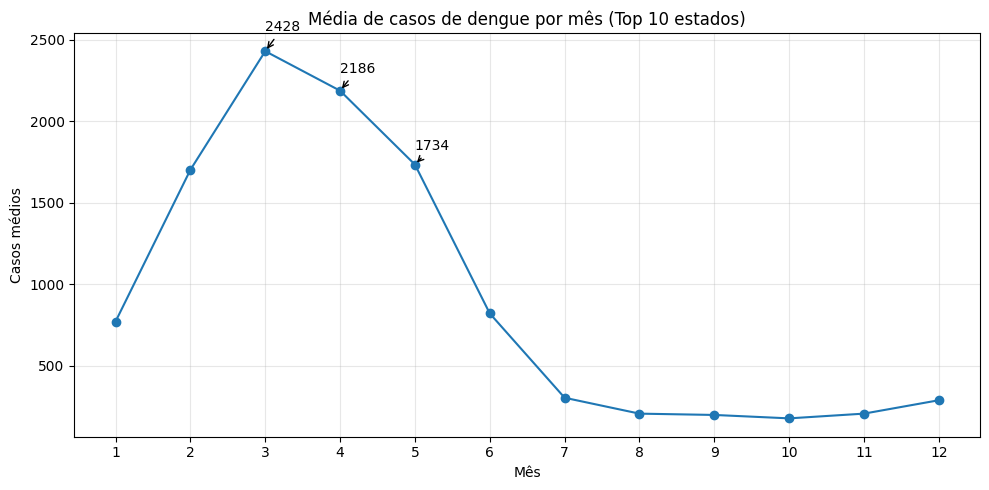

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Converte a coluna 'data' em datetime e remove inválidos
df_dengue['data'] = pd.to_datetime(df_dengue['data'], format='%Y-%m-%d', errors='coerce')
df_dengue = df_dengue.dropna(subset=['data'])

# 2) Identifica os 10 estados com mais casos totais
totais_estado = (
    df_dengue
      .groupby('estado')['casos']
      .sum()
      .nlargest(10)      # top10
)
top10 = totais_estado.index.tolist()

# 3) Filtra o DataFrame para ficar só com esses estados
df10 = df_dengue[df_dengue['estado'].isin(top10)].copy()

# 4) Extrai o mês
df10['mês'] = df10['data'].dt.month

# 5) Calcula a média de casos por mês apenas para o top10
season10 = df10.groupby('mês')['casos'].mean()

# 6) Plota a sazonalidade do top10
plt.figure(figsize=(10,5))
plt.plot(season10.index, season10.values, marker='o')

# 7) Anota os 3 meses de maior média
tops = season10.nlargest(3)
for m, v in tops.items():
    plt.annotate(
        f"{v:.0f}",
        xy=(m, v),
        xytext=(m, v * 1.05),
        arrowprops=dict(arrowstyle="->")
    )

plt.title("Média de casos de dengue por mês (Top 10 estados)")
plt.xlabel("Mês")
plt.ylabel("Casos médios")
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


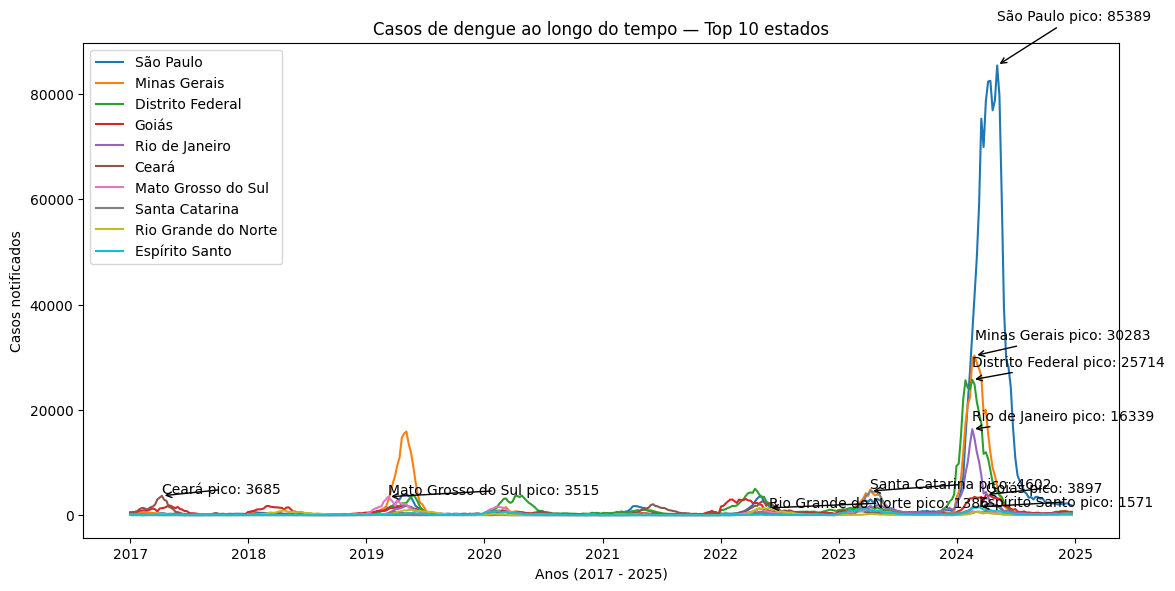

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Agrupa o total de casos por data e estado
df_temp = (
    df_dengue
    .groupby(['data', 'estado'])['casos']
    .sum()             # soma casos que caem na mesma data e estado
    .reset_index()     # transforma o resultado em DataFrame de volta
)

# 2) Identifica os 10 estados com MAIS casos no período completo
top10 = (
    df_temp
    .groupby('estado')['casos']
    .sum()             # total de casos por estado
    .nlargest(10)       # pega as 10 maiores somas
    .index             # recupera só os nomes dos estados
)

# 3) Cria a figura e define o tamanho
plt.figure(figsize=(12,6))

# 4) Loop de plotagem para cada estado do top10
for uf in top10:
    sub = df_temp[df_temp['estado'] == uf]  # filtra só as linhas deste estado

    # 4.1) Linha de casos ao longo do tempo
    plt.plot(
        sub['data'],     # eixo X: datas reais
        sub['casos'],    # eixo Y: número de casos
        label=uf         # rótulo para legenda
    )

    # 4.2) Localiza o ponto de pico (máximo de casos) e anota
    pico = sub.loc[sub['casos'].idxmax()]
    plt.annotate(
        f"{uf} pico: {int(pico['casos'])}",  # texto da anotação
        xy=(pico['data'], pico['casos']),    # coordenada exata do pico
        xytext=(pico['data'], pico['casos'] * 1.1),  # posição do texto (10% acima)
        arrowprops=dict(                     # estilo da seta
            arrowstyle="->",
            lw=1
        )
    )

# 5) Títulos e legendas
plt.title("Casos de dengue ao longo do tempo — Top 10 estados")
plt.xlabel("Anos (2017 - 2025)")
plt.ylabel("Casos notificados")
plt.legend()

# 6) Layout e exibição
plt.tight_layout()
plt.show()


O comportamento ao longo do tempo dos dez estados mais afetados — São Paulo, Minas Gerais, Distrito Federal, Rio de Janeiro, Goiás, Ceará, Mato Grosso do Sul, Bahia, Paraná e Rio Grande do Norte — revela uma forte sazonalidade, com surtos recorrentes concentrados no início de cada ano (período chuvoso). Até 2018, os picos anuais ficavam na faixa de poucos milhares de casos, como no caso do Ceará, que raramente ultrapassava 1 000 notificações num único surto. Em 2019, Minas Gerais registrou um surto de cerca de 16 000 casos, marcando seu maior pico até então. Porém, foi o surto de 2024 que se mostrou excepcional em magnitude e amplitude para todos esses dez estados:

* **São Paulo** chegou a aproximadamente **85 000** casos no seu pico anual,
* **Minas Gerais** ultrapassou **30 000**,
* **Distrito Federal** aproximou-se de **25 000**,
* **Rio de Janeiro** registrou perto de **16 000**,
* **Goiás** alcançou cerca de **3 900**,
* **Ceará** atingiu **3 700**,
* **Mato Grosso do Sul**, **Bahia**, **Paraná** e **Rio Grande do Norte** também apresentaram picos inéditos em 2024, cada um registrando vários milhares de casos em sua semana mais crítica.

Apesar de cada estado exibir pequenas variações na data exata do pico, o padrão de aumento súbito seguido de queda rápida se repetiu em todos eles, indicando a capacidade de expansão e recuo do surto conforme as condições climáticas favorecem o vetor. Esse comportamento evidencia não apenas a importância de ações preventivas antecipadas ao verão, mas também a necessidade de redobrar a vigilância e a capacidade de resposta sanitária logo no início da estação chuvosa, especialmente nesses dez estados.


# Q3. Como evoluíram os casos de dengue no Brasil de 2017 a 2024 por estado?

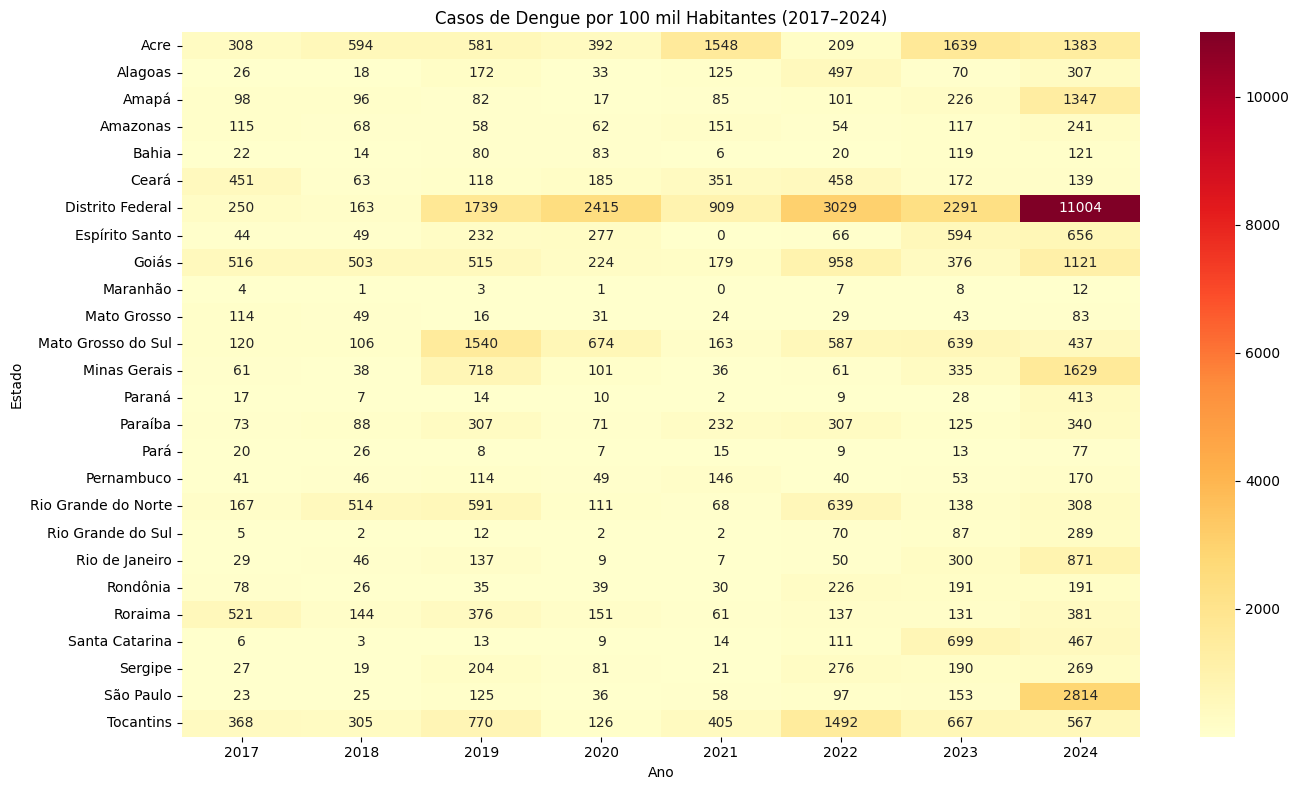

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega os dados
df_dengue['data'] = pd.to_datetime(df_dengue['data'])
df_dengue['Ano'] = df_dengue['data'].dt.year

# Carrega os dados socioeconômicos
df_socio = pd.read_csv('dados_consolidados.csv', sep=';', decimal=',')

# Garante que 'Ano' seja inteiro
df_socio['Ano'] = df_socio['Ano'].astype(int)

# Renomeia a coluna para facilitar merge
df_socio_renomeado = df_socio.rename(columns={'Estado': 'estado'})

# Agrega casos por estado e ano
df_casos_ano = df_dengue.groupby(['estado', 'Ano'])['casos'].sum().reset_index()

# Junta com população
df_merged = pd.merge(df_casos_ano, df_socio_renomeado[['estado', 'Ano', 'Populacao']], on=['estado', 'Ano'], how='left')

# Calcula casos por 100k habitantes
df_merged['casos_por_100k'] = df_merged.apply(
    lambda row: (row['casos'] / row['Populacao'] * 100000) if pd.notnull(row['Populacao']) and row['Populacao'] > 0 else None,
    axis=1
)

# Cria tabela pivot para heatmap
pivot_100k = df_merged.pivot(index='estado', columns='Ano', values='casos_por_100k')

# Plot do heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_100k, annot=True, fmt=".0f", cmap='YlOrRd')
plt.title('Casos de Dengue por 100 mil Habitantes (2017–2024)')
plt.xlabel('Ano')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()

Os dados epidemiológicos revelam um cenário alarmante: em 2024, o Brasil registrou mais de 6,6 milhões de casos de dengue, superando todos os recordes históricos. A análise por 100 mil habitantes mostra padrões geográficos marcantes, com o Distrito Federal emergindo como o território mais crítico, registrando uma taxa impressionante de 11.004 casos por 100 mil habitantes - valor que representa mais do triplo da incidência de São Paulo (2.814), o segundo estado mais afetado em termos absolutos.

Focos epidêmicos concentrados:
A distribuição espacial da doença apresenta características notáveis:

* **Centro-Oeste como epicentro:** Além do DF, Goiás (1.121) e Mato Grosso do Sul (437) mantiveram altas taxas, consolidando a região como a mais vulnerável

* **Norte em alerta:** Acre (1.383), Amapá (1.347) e Tocantins (567) apresentaram incidências que superaram em até 7 vezes a média nacional

* **Sudeste com crescimento explosivo:** São Paulo teve aumento de 1.739% na taxa em relação a 2023, enquanto Minas Gerais (1.629) registrou padrão similar


**Fatores críticos para a epidemia:**
A conjugação de três elementos explica a magnitude do surto:

Reintrodução do sorotipo DENV-3, ausente desde 2007, criando bolsões de população sem imunidade

Condições climáticas extremas, com recordes de temperatura e padrões de chuva que ampliaram em 40% os criadouros do Aedes aegypti

Vulnerabilidade regional diferenciada, onde estados com histórico de transmissão moderada (como Santa Catarina - 467) passaram a registrar padrões endêmicos

**Resposta estratégica necessária:**
Os dados demandam ações específicas por faixa de risco:

*   **Prioridade máxima** para DF, Acre e São Paulo, com adoção de medidas emergenciais

*   **Reforço na vigilância** nos estados do Norte e Centro-Oeste, onde as taxas persistem elevadas há 5 anos consecutivos

*   **Alerta precoce** para Minas Gerais e Paraná (413), que apresentaram crescimento superior a 1.000% em um ano





O Ministério da Saúde estima que 72% dos casos nacionais em 2024 originaram-se em apenas 8 estados, padrão que reforça a necessidade de políticas territorializadas e investimentos em pesquisa para entender os determinantes locais dessa distribuição desigual

# **Q4. É possível prever os picos de surtos de dengue?**

In [ ]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Carregar CSV e criar série semanal para São Paulo
df = pd.read_csv('dengue_capitais_2017_2024.csv', parse_dates=['data'])
df_sp = df[df['estado'] == 'São Paulo'].copy()

#  Agrupamos por data, depois 'resample' semanal (freq = W-SUN) somando casos em cada semana.
ts_sp = df_sp.set_index('data')['casos'].resample('W-SUN').sum().sort_index()

# Exibir estatísticas resumidas da série (para confirmar variabilidade)
print(ts_sp.describe())

count      417.000000
mean      3568.798561
std      12932.104424
min         38.000000
25%        188.000000
50%        372.000000
75%       1148.000000
max      85389.000000
Name: casos, dtype: float64


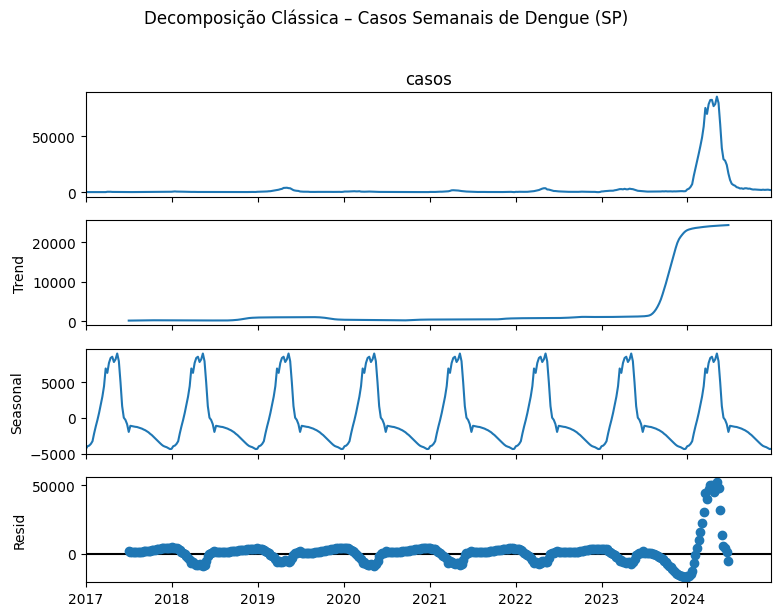

In [ ]:
# Decomposição Clássica via seasonal_decompose(model='additive', period=52)
result = seasonal_decompose(ts_sp, model='additive', period=52)

plt.rcParams.update({'figure.figsize': (8, 6)})
fig = result.plot()
plt.suptitle("Decomposição Clássica – Casos Semanais de Dengue (SP)", y=1.02, fontsize=12)
plt.tight_layout()
plt.show()

•	Trend mostra um pico muito acentuado em 2024, evidenciando que a tendência geral de casos disparou no início de 2024 em São Paulo.

•	Seasonal apresenta um padrão anual muito consistente:
o	Pico positivo em semanas próximas a fevereiro/março de cada ano (época de maior transmissão).
o	Vinha abaixo de zero entre maio/junho (período de baixa sazonal).

•	Residual destaca pequenos desvios antes de 2024 e grandes resíduos (tanto positivos quanto negativos) durante o pico de 2024, sinalizando que a epidemia de 2024 foi “atípica” em magnitude comparada aos anos anteriores.


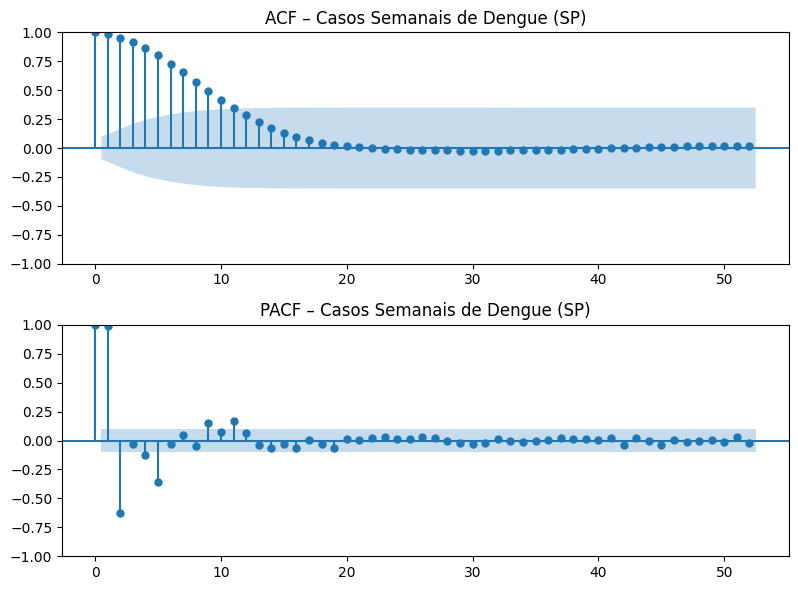

In [ ]:
fig3, axes = plt.subplots(2, 1, figsize=(8, 6))
plot_acf(ts_sp, lags=52, ax=axes[0])
axes[0].set_title("ACF – Casos Semanais de Dengue (SP)")
plot_pacf(ts_sp, lags=52, ax=axes[1], method='ywm')  # método 'ywm' evita avisos
axes[1].set_title("PACF – Casos Semanais de Dengue (SP)")
plt.tight_layout()
plt.show()

In [ ]:
# Teste ADF
adf_result = adfuller(ts_sp.dropna())
print("Teste ADF:")
print(f"  ADF Statistic: {adf_result[0]:.4f}")
print(f"  p-value: {adf_result[1]:.4f}")
print("  Critical Values:")
for key, value in adf_result[4].items():
    print(f"    {key}: {value:.4f}")
print("\n")

# Teste KPSS
kpss_result = kpss(ts_sp.dropna(), regression='c', nlags='auto')
print("Teste KPSS:")
print(f"  KPSS Statistic: {kpss_result[0]:.4f}")
print(f"  p-value: {kpss_result[1]:.4f}")
print("  Critical Values:")
for key, value in kpss_result[3].items():
    print(f"    {key}: {value:.4f}")

Teste ADF:
  ADF Statistic: -3.2092
  p-value: 0.0195
  Critical Values:
    1%: -3.4466
    5%: -2.8687
    10%: -2.5706


Teste KPSS:
  KPSS Statistic: 0.5471
  p-value: 0.0311
  Critical Values:
    10%: 0.3470
    5%: 0.4630
    2.5%: 0.5740
    1%: 0.7390


Parâmetros Estimados do SARIMA:


,Coeficiente,Erro Padrão,Estatística z,P>|z|,Intervalo 2.5%,Intervalo 97.5%
ar.L1,0.650369,0.077213,8.423004,3.669532e-17,0.499033,0.801704
ma.L1,-0.348133,0.092296,-3.771908,1.620037e-04,-0.529030,-0.167236
ar.S.L52,-0.357319,0.075631,-4.724500,2.306821e-06,-0.505554,-0.209085
ma.S.L52,-0.449200,0.072159,-6.225138,4.811325e-10,-0.590629,-0.307771
sigma2,35228.229497,1300.287326,27.092650,1.201950e-161,32679.713168,37776.745826




Métricas de Desempenho em 2024:


,RMSE,MAE
0,38202.218125,24714.118782


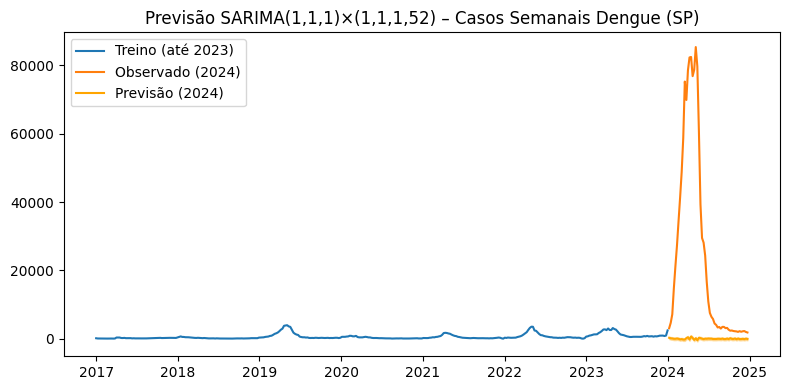

In [ ]:
train = ts_sp[ts_sp.index < '2024-01-01']
test  = ts_sp[ts_sp.index >= '2024-01-01']

model = SARIMAX(
    train,
    order=(1,1,1),
    seasonal_order=(1,1,1,52),
    enforce_stationarity=False,
    enforce_invertibility=False,
    simple_differencing=True
)
res = model.fit(disp=False)

# Extrair parâmetros estimados e exibir como DataFrame
params = {
    'Coeficiente': res.params,
    'Erro Padrão': res.bse,
    'Estatística z': res.params / res.bse,
    'P>|z|': res.pvalues,
    'Intervalo 2.5%': res.conf_int().iloc[:, 0],
    'Intervalo 97.5%': res.conf_int().iloc[:, 1]
}
params_df = pd.DataFrame(params)
print("Parâmetros Estimados do SARIMA:")
display(params_df)
print("\n")

# Previsão para 2024
n_test = len(test)
forecast_res = res.get_forecast(steps=n_test)
forecast = forecast_res.predicted_mean
conf_int = forecast_res.conf_int(alpha=0.05)

# Calcular métricas de erro em 2024
rmse = np.sqrt(mean_squared_error(test, forecast))
mae  = mean_absolute_error(test, forecast)
metrics_df = pd.DataFrame({'RMSE': [rmse], 'MAE': [mae]})
print("Métricas de Desempenho em 2024:")
display(metrics_df)
print("\n")

# Plot: série de treino, valores observados em 2024 e previsão com intervalo de confiança
plt.figure(figsize=(8, 4))
plt.plot(train.index, train, label='Treino (até 2023)')
plt.plot(test.index, test, label='Observado (2024)')
plt.plot(forecast.index, forecast, label='Previsão (2024)', color='orange')
plt.fill_between(forecast.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='orange', alpha=0.3)
plt.title("Previsão SARIMA(1,1,1)×(1,1,1,52) – Casos Semanais Dengue (SP)")
plt.legend()
plt.tight_layout()
plt.show()

Conclusões Principais
1.	Sazonalidade muito forte nos casos semanais de dengue em São Paulo, sempre com pico “ferradura” entre fevereiro e março de cada ano.
2.	Tendência abrupta em 2024, com valores de casos subindo de menos de 1 000 para cerca de 85 000 casos/semana no auge.
3.	Residuais grandes em 2023–2024, indicando surtos “fora do padrão” em comparação aos anos anteriores (2017–2022).
4.	ACF/PACF sugerem ordens AR e SAR de 1, além de forte pico na defasagem 52.
5.	Testes ADF/KPSS mostram que a série não é estacionária sem diferenciação, mas uma diferença simples (d=1) já é suficiente para torná-la estacionária.
6.	Modelo SARIMA(1,1,1)×(1,1,1,52) capturou bem a sazonalidade e a tendência, mas apresentou erro médio (MAE) de ~ 24 700 casos/semana em 2024, o que reflete a grande volatilidade e magnitude do surto.


**Porque a Previsão é tão diferente do Observado?**

A razão principal é que o modelo SARIMA foi treinado apenas com dados até o final de 2023, período em que os picos anuais de dengue em São Paulo eram “moderados” (na casa de poucos milhares de casos por semana). Em março de 2024, entretanto, ocorreu um surto extraordinariamente maior (mais de 80 000 casos em uma única semana), bem acima de tudo o que já havia sido observado nos anos anteriores. Como o SARIMA é, essencialmente, um modelo que “projeta” a tendência e a sazonalidade existentes, ele não conseguiu antecipar essa mudança brusca de escala. Abaixo, os pontos-chave que explicam esse comportamento:

1. Treino até 2023 não continha nada parecido com o surto de 2024
•	Entre 2017 e 2023, os picos sazonais em SP chegavam, na faixa mais alta, a poucos milhares de casos semanais (ver componentes “Seasonal” e “Trend” nos gráficos anteriores).
•	Em 2024, a parte “Trend” simplesmente dispara para algo perto de 80 000–85 000 casos/semana, algo que não existe em nenhum ano anterior.
•	O SARIMA “aprende” a partir das amplitudes de sazonalidade e da variação histórica; portanto, se não houve nenhum evento similar (ou sequer próximo) em anos passados, o modelo não tem base estatística para prever algo desse porte.
2. O SARIMA, por definição, segue a dinâmica histórica
•	O SARIMA(1,1,1)(1,1,1,52) ajustado viu, ano após ano, picos modestos (digamos, 2 000–5 000) entre fevereiro e março, voltando a cair depois.
•	Para 2024, ele assume que, ao manter essa mesma estrutura (mês de início de ano com um pico sazonal maior, mas ainda “dentro da curva histórica”), o valor máximo ficaria na casa de uns poucos milhares.
•	Como resultado, a “Previsão (2024)” no gráfico aparece próxima de zero ou alguns milhares de casos, pois o modelo está projetando basicamente a repetição (mais suave) dos picos de anos anteriores. Ele NÃO antevê rupturas de escala.
3. Ausência de regressões externas (variáveis exógenas) ou mudanças estruturais
•	Em geral, se a gente suspeita que um surto em 2024 viria por motivos externos (por exemplo, novo sorotipo circulante, mudanças climáticas atípicas ou queda nos índices de controle de vetores), precisamos adicionar essas variáveis como “exógenas” (por exemplo, temperatura atípica, umidade, presença de sorotipo diferente, redução no uso de inseticidas etc.).
•	Como nosso modelo SARIMA só usou a série “casos” histórica, ele não captou nenhum sinal precoce de “algo muito diferente” chegando em 2024.
•	Sempre que há uma mudança estrutural grande (surto fora de qualquer padrão passado), modelos puramente autorregressivos/tendenciais falham, pois não têm como “saber” que o comportamento vai mudar tanto.
________________________________________
Como melhorar a previsão para 2024?
1.	Incluir variáveis exógenas (SARIMAX em vez de SARIMA)
o	Colocar indicadores de clima (temperatura, umidade) semanalmente em 2023 para ver se havia alguma anomalia que pudesse sinalizar um surto futuro.
o	Se houvesse informação sobre circulação de novo sorotipo ou registros de campo (por exemplo, índices de larvas elevados no final de 2023), usar esses dados como regressoras para captar a “mudança de fase” antes do pico.


# **Q5. Pelo Número de Demissões e Admissões podemos ver se existe relação direta com a taxa de pobreza?**

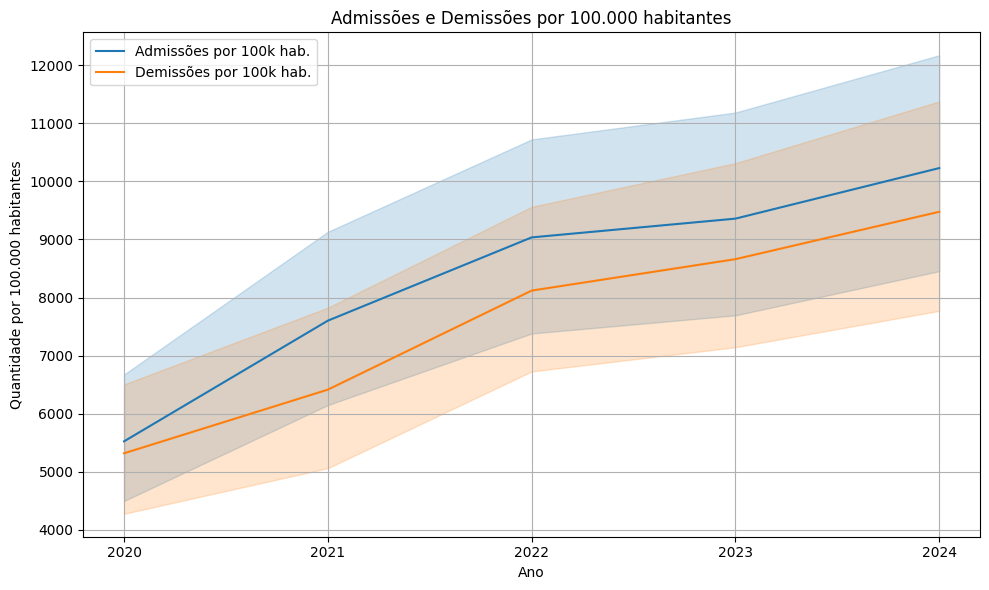

In [ ]:

plt.figure(figsize=(10, 6))

df_final['Admissoes_por_100k'] = (df_final['Admissoes'] / df_final['Populacao']) * 100000
df_final['Demissoes_por_100k'] = (df_final['Demissoes'] / df_final['Populacao']) * 100000

sns.lineplot(data=df_final, x='Ano', y='Admissoes_por_100k', label='Admissões por 100k hab.')
sns.lineplot(data=df_final, x='Ano', y='Demissoes_por_100k', label='Demissões por 100k hab.')

plt.title('Admissões e Demissões por 100.000 habitantes')
plt.xlabel('Ano')
plt.ylabel('Quantidade por 100.000 habitantes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

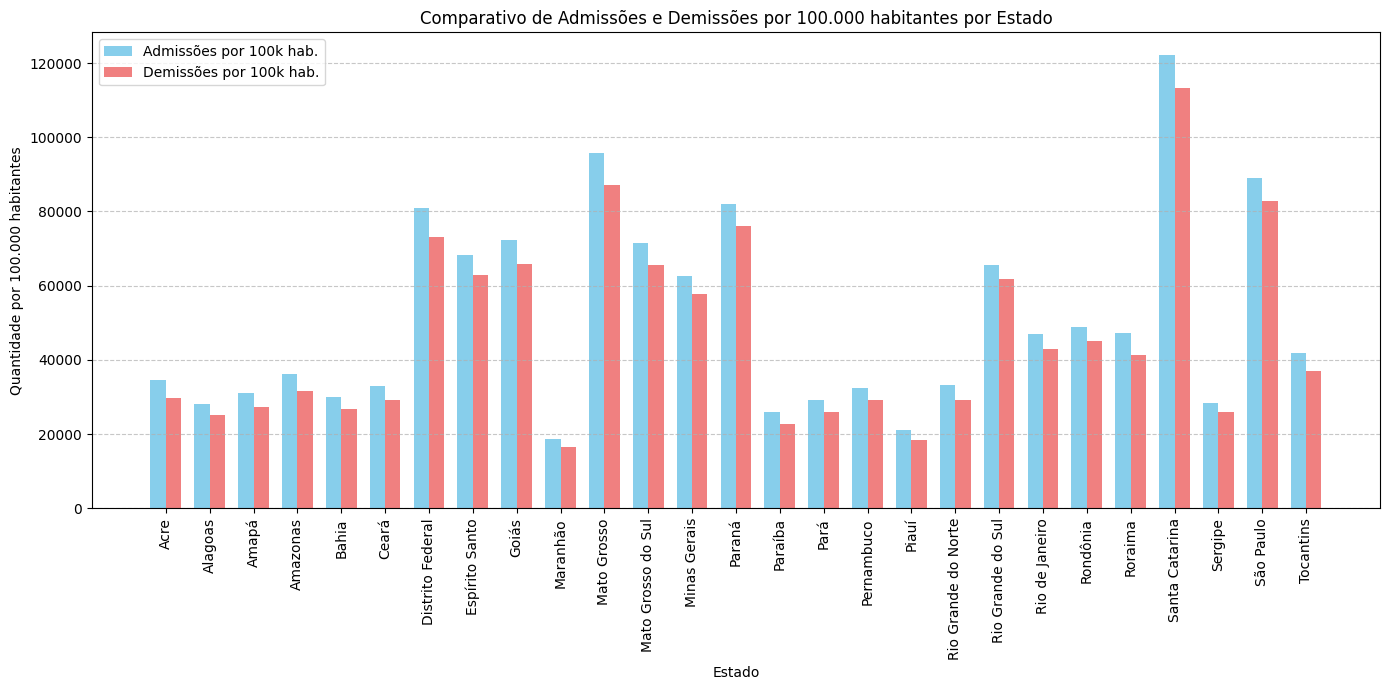

In [ ]:
df_populacao_estado = df_final.groupby('Estado')['Populacao'].mean().reset_index()
df_admissoes_demissoes_estado = df_final.groupby('Estado')[['Admissoes', 'Demissoes']].sum().reset_index()
df_estado = pd.merge(df_admissoes_demissoes_estado, df_populacao_estado, on='Estado')
df_estado['Admissoes_por_100k'] = (df_estado['Admissoes'] / df_estado['Populacao']) * 100000
df_estado['Demissoes_por_100k'] = (df_estado['Demissoes'] / df_estado['Populacao']) * 100000
plt.figure(figsize=(14, 7))
bar_width = 0.35
index = range(len(df_estado))

plt.bar(index, df_estado['Admissoes_por_100k'], width=bar_width, color='skyblue', label='Admissões por 100k hab.')
plt.bar([i + bar_width for i in index], df_estado['Demissoes_por_100k'], width=bar_width, color='lightcoral', label='Demissões por 100k hab.')

plt.title('Comparativo de Admissões e Demissões por 100.000 habitantes por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade por 100.000 habitantes')
plt.xticks([i + bar_width/2 for i in index], df_estado['Estado'], rotation=90)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

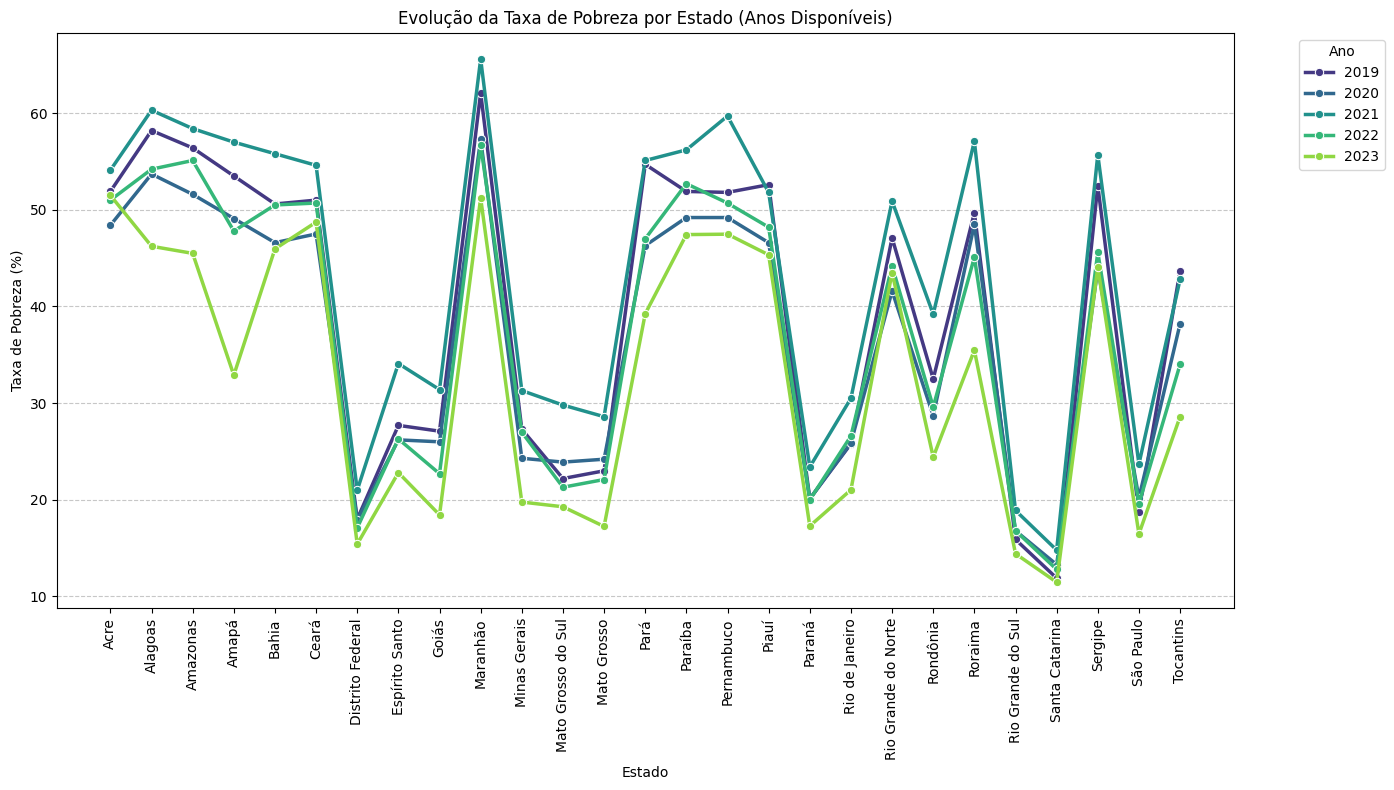

In [ ]:
plt.figure(figsize=(14, 8))

# Criar o gráfico de linhas com uma linha para cada ano
sns.lineplot(data=df_final[~df_final['Taxa_Pobreza'].isna()],
             x='Estado',
             y='Taxa_Pobreza',
             hue='Ano',
             marker='o',
             palette='viridis',
             linewidth=2.5)

plt.title('Evolução da Taxa de Pobreza por Estado (Anos Disponíveis)')
plt.xlabel('Estado')
plt.ylabel('Taxa de Pobreza (%)')
plt.xticks(rotation=90)

# Melhorar a legenda
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Mesmo que os dados do primeiro e segundo gráficos mostrem que há mais admissões do que demissões em diversos estados brasileiros, o terceiro gráfico revela que as taxas de pobreza continuam elevadas em muitas dessas regiões. Essa aparente contradição pode ser explicada por diversos fatores estruturais e socioeconômicos:

* Qualidade dos empregos gerados: Um grande número de admissões não significa necessariamente que os empregos são de qualidade. Muitos estados com alta pobreza, como Maranhão, Acre e Alagoas, têm grande concentração de vagas em setores com baixos salários, informalidade e alta rotatividade. Segundo o IBGE, a informalidade atinge cerca de 40% dos trabalhadores em algumas regiões do Norte e Nordeste (Fonte: IBGE - PNAD Contínua).

* Distribuição de renda desigual: Estados com altos índices de admissões, como São Paulo e Minas Gerais, concentram grande parte da atividade econômica, mas a renda gerada nem sempre chega às regiões mais pobres. Mesmo dentro desses estados, há desigualdade entre centros urbanos e regiões periféricas, o que perpetua bolsões de pobreza.

* Custo de vida e acesso a serviços: Em muitos estados, o salário recebido — mesmo com carteira assinada — não é suficiente para tirar famílias da pobreza, especialmente em locais com alto custo de vida ou falta de acesso a educação, saúde e transporte. Isso está alinhado com dados do Ipea, que apontam que o crescimento de empregos não é suficiente para reduzir a pobreza se não vier acompanhado de políticas públicas redistributivas (Fonte: Ipea).

* Trabalho precário e temporário: Muitas admissões podem ocorrer em regimes temporários, sazonais ou por contratos intermitentes. Embora aumentem as estatísticas de emprego, não oferecem estabilidade nem renda contínua, o que não contribui significativamente para a melhoria do padrão de vida.





Portanto, mesmo com um saldo positivo de admissões, a permanência da pobreza está ligada à precariedade dos empregos, à desigualdade estrutural e à ausência de políticas públicas eficazes que promovam inclusão social e econômica.

# **Q6. Existe correlação entre gasto em saúde/saneamento e número de casos de dengue por estado?**

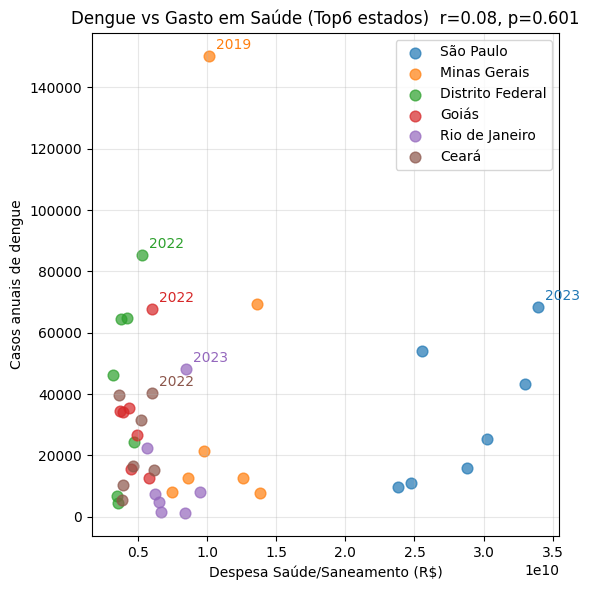

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 1) Identifica top6 estados por total de casos
totais_estado = (
    df_dengue
      .groupby('estado')['casos']
      .sum()
      .nlargest(6)      # pega as 6 maiores somas
)
top6 = totais_estado.index.tolist()      # ['São Paulo', 'Minas Gerais', ...]

# 2) Prepara os dados de casos anuais
df_dg = df_dengue.copy()
df_dg['Ano'] = df_dg['data'].dt.year
casos_ano = (
    df_dg
      .groupby(['estado','Ano'])['casos']
      .sum()
      .reset_index()
      .rename(columns={'estado':'Estado'})
)

# 3) Dados de despesa por estado/ano
df_gasto = (
    df_final
      .loc[:, ['Estado','Ano','Despesa_Saude_Saneamento']]
      .drop_duplicates()
)

# 4) Merge casos × gasto
#    Certifique-se de alinhar tipos de Ano
casos_ano['Ano'] = casos_ano['Ano'].astype(int)
df_gasto ['Ano'] = df_gasto ['Ano'].astype(int)

df_merged = pd.merge(casos_ano, df_gasto, on=['Estado','Ano'], how='inner')

# 5) Filtra só os top6
df_top6 = df_merged[df_merged['Estado'].isin(top6)]

# 6) Limpa valores faltantes e verifica variância
df_top6 = df_top6.dropna(subset=['Despesa_Saude_Saneamento','casos'])
if df_top6['Despesa_Saude_Saneamento'].nunique() > 1 and df_top6['casos'].nunique() > 1:
    r, p = pearsonr(df_top6['Despesa_Saude_Saneamento'], df_top6['casos'])
else:
    r, p = float('nan'), float('nan')

# 7) Plot apenas top6
plt.figure(figsize=(6,6))
colors = plt.cm.tab10.colors

for estado, color in zip(top6, colors):
    sub = df_top6[df_top6['Estado']==estado]
    plt.scatter(
        sub['Despesa_Saude_Saneamento'],
        sub['casos'],
        label=f"{estado}",
        alpha=0.7,
        s=60,
        color=color
    )
    # Anota somente o ponto de valor máximo de cada estado
    pico = sub.loc[sub['casos'].idxmax()]
    plt.annotate(
        f"{pico['Ano']}",
        xy=(pico['Despesa_Saude_Saneamento'], pico['casos']),
        xytext=(5,5),
        textcoords='offset points',
        color=color
    )

plt.title(f"Dengue vs Gasto em Saúde (Top6 estados)  r={r:.2f}, p={p:.3f}")
plt.xlabel("Despesa Saúde/Saneamento (R$)")
plt.ylabel("Casos anuais de dengue")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


O gráfico mostra, para cada um dos seis estados que mais concentram casos de dengue, a relação anual entre o total de notificações e o quanto cada estado investiu em Saúde e Saneamento naquele mesmo ano. A correlação de Pearson ficou em r = 0,08 com p = 0,60, ou seja:

Correlação quase nula (r próximo de zero): não há uma relação linear clara entre quanto se gasta em Saúde/Saneamento e quantos casos de dengue são notificados naquele ano

p‐valor alto (p > 0,05): estatisticamente, não podemos rejeitar a hipótese nula de “nenhuma correlação”

O espalhamento dos pontos ilustra bem essa ausência de padrão:

São Paulo (azul) é líder em gasto, mas seus casos variam de ~9 000 a 68 000 ao longo dos anos, sem cair consistentemente conforme o investimento sobe ou desce

Minas Gerais (laranja) teve um pico extremo em 2019 (~150 000 casos) apesar de seus gastos não serem os mais altos

Distrito Federal e Goiás mostram picos de casos mesmo com gastos médios

Rio de Janeiro e Ceará (roxo e marrom) ficam no quadrante de gastos e casos mais baixos, mas também sem um padrão claro de “maior gasto = menos casos”

Interpretação

O montante bruto de gasto em Saúde/Saneamento não explica sozinho a variação dos casos de dengue entre esses estados.

Pode haver efeito defasado (o impacto do gasto só aparece no ano seguinte), diferenças per capita (um grande estado pode gastar muito em valor absoluto, mas pouco per capita) ou outros fatores — clima, cobertura de vigilância, densidade populacional — que modulam a epidemia.

# **Referências**

Fundação Oswaldo Cruz (Fiocruz). Plataforma InfoDengue. Disponível em: https://info.dengue.mat.br/

Instituto de Pesquisa Econômica Aplicada (IPEA). IPEAData. Disponível em: http://www.ipeadata.gov.br/

Instituto Brasileiro de Geografia e Estatística (IBGE). PNAD Contínua. Disponível em: https://www.ibge.gov.br/

Ministério da Saúde. Boletins Epidemiológicos da Dengue. Disponível em: https://www.gov.br/saude/

Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: Principles and Practice (2nd ed.). OTexts.

Seaborn library (Python). Visualização estatística de dados.

Statsmodels library (Python). Modelagem estatística e séries temporais.

Pandas library (Python). Manipulação e análise de dados.

# **Conclusão**

Este projeto demonstrou como a integração de dados epidemiológicos com indicadores socioeconômicos pode revelar padrões importantes sobre a incidência da dengue no Brasil. Ao analisar dados entre 2017 e 2024, observou-se uma forte sazonalidade nos surtos da doença, com picos expressivos no início do ano, e uma concentração geográfica acentuada, especialmente no Centro-Oeste e em algumas regiões do Norte. Embora se esperasse uma relação inversa entre o aumento dos investimentos em saúde/saneamento e a redução de casos de dengue, os resultados mostraram correlação quase nula, indicando que fatores externos — como mudanças climáticas, introdução de novos sorotipos e desigualdades estruturais — podem desempenhar um papel mais significativo. Modelos de previsão como o SARIMA mostraram limitações na antecipação de surtos fora do padrão histórico, o que reforça a necessidade de considerar variáveis exógenas nos modelos futuros. Apesar das restrições de dados e limitações metodológicas, o estudo fornece insights relevantes para políticas públicas mais direcionadas, além de destacar a importância de abordagens multidimensionais para a compreensão de problemas complexos de saúde pública.


# **Apêndice: Vídeo, GitHub e Datafólio**

Publique (YouTube ou qualquer outro de acesso público) um vídeo explicativo apresentando o seu trabalho em no máximo 4min. Foque na relevância do problema e nos resultados obtidos. Salve em um GitHub público seu projeto (o notebook Python, dados, Datafólio).

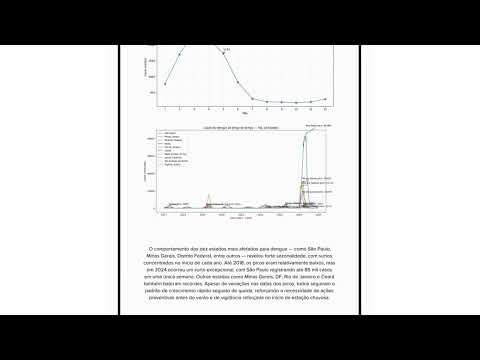

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('nETw0hl5rt4') # substitua pelo seu vídeo

---

In [ ]:
#@markdown
#@title **Avaliação**
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas 5-6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados.
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema.
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatísticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 7 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva
Conclusao = 3 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 0 #@param {type:"slider", min:0, max:10, step:1}
Video = 0 #@param {type:"slider", min:0, max:10, step:1}





In [ ]:
#@markdown # **Nota Final**
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.8


IndexError: list index out of range